In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/csbfx/cs133/main/anime_ratings.csv')
df = df.dropna(
)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15310 entries, 0 to 19310
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15310 non-null  int64  
 1   uid         15310 non-null  int64  
 2   title       15310 non-null  object 
 3   synopsis    15310 non-null  object 
 4   genre       15310 non-null  object 
 5   aired       15310 non-null  object 
 6   episodes    15310 non-null  float64
 7   popularity  15310 non-null  int64  
 8   ranked      15310 non-null  float64
 9   score       15310 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.3+ MB


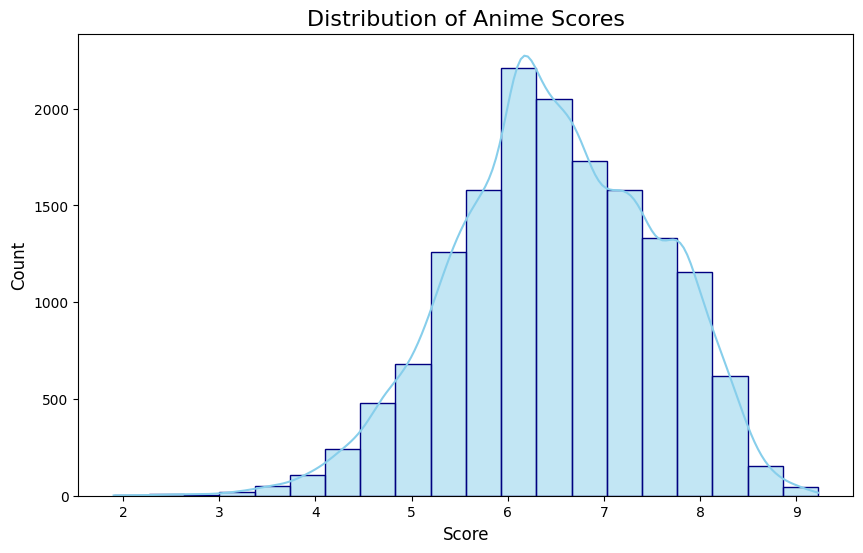

In [24]:

# Create a histogram of anime scores with a color gradient
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='score', bins=20, kde=True, color='skyblue', edgecolor='navy')
plt.title('Distribution of Anime Scores', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

<ipython-input-25-604bb6795f59>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


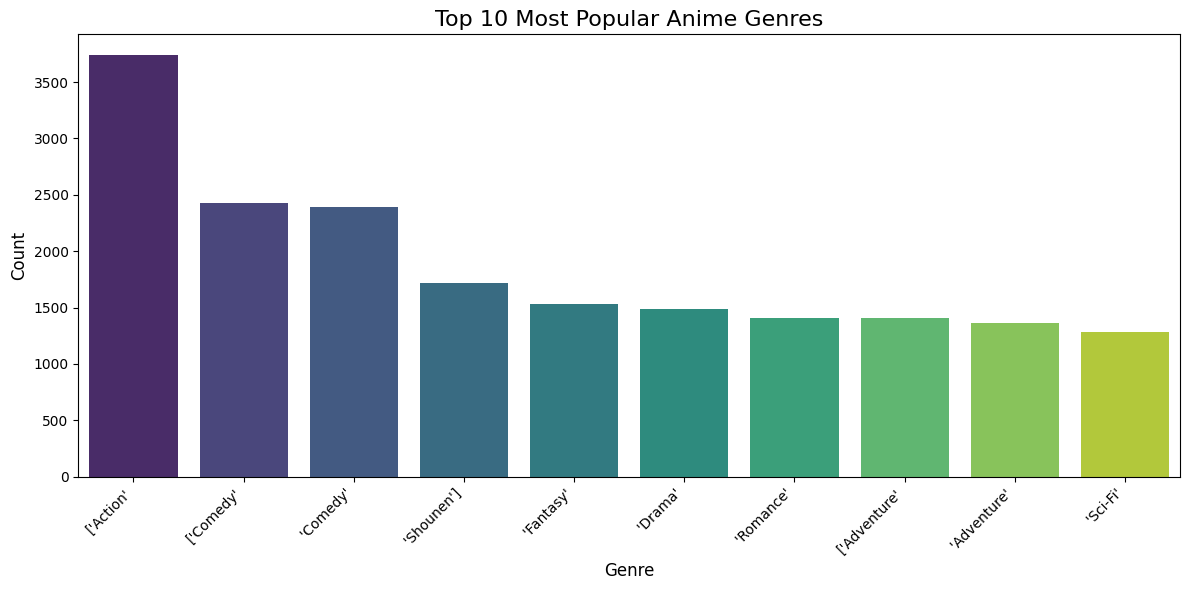

In [25]:
genre_counts = df['genre'].str.split(',', expand=True).stack().value_counts().nlargest(10)

# Create a bar plot with a colorful palette
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Top 10 Most Popular Anime Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



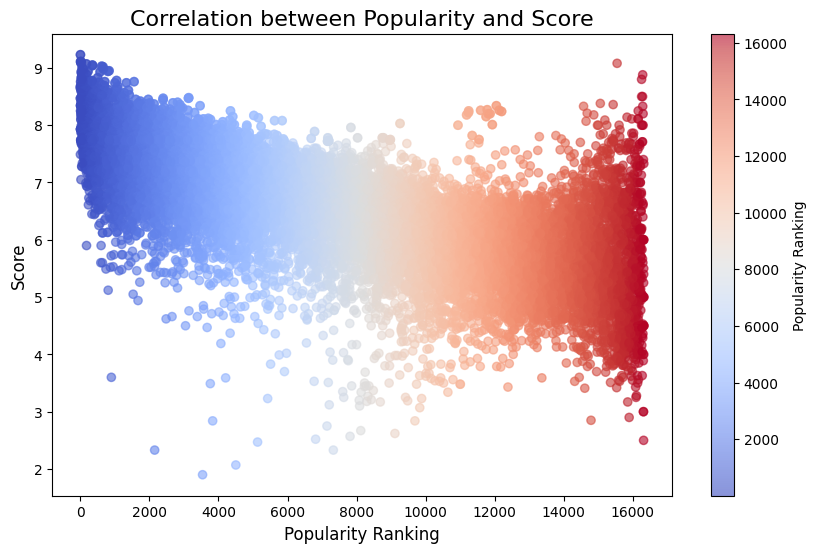

In [26]:

# Create a scatter plot with a color gradient based on popularity
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['popularity'], df['score'], c=df['popularity'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Popularity Ranking')
plt.title('Correlation between Popularity and Score', fontsize=16)
plt.xlabel('Popularity Ranking', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.show()

<ipython-input-27-9bd63e6073bb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='Set2')


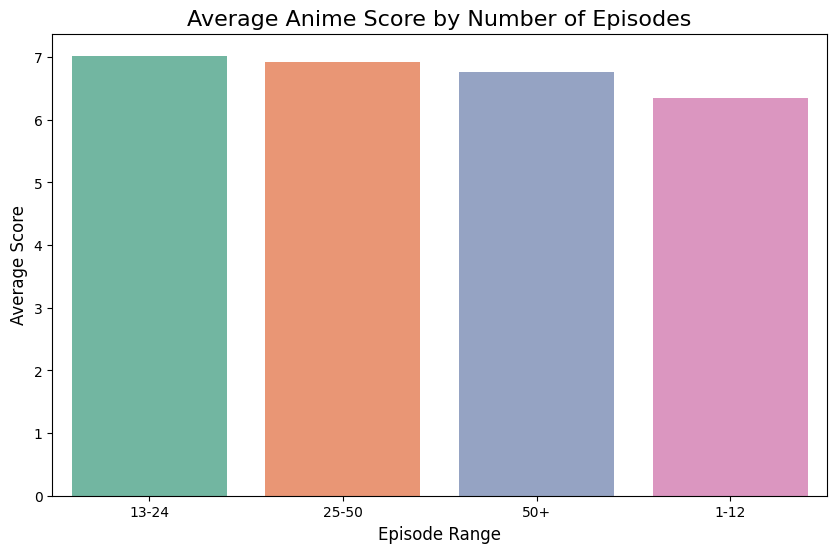

In [27]:
def episode_group(episodes):
    if episodes <= 12:
        return '1-12'
    elif episodes <= 24:
        return '13-24'
    elif episodes <= 50:
        return '25-50'
    else:
        return '50+'

# Apply the grouping function and calculate average scores
df['episode_group'] = df['episodes'].apply(episode_group)
avg_scores = df.groupby('episode_group')['score'].mean().sort_values(ascending=False)

# Create a bar plot with a custom color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='Set2')
plt.title('Average Anime Score by Number of Episodes', fontsize=16)
plt.xlabel('Episode Range', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.show()



To enhance our analysis, we might want to incorporate additional datasets. For example, we could look for data on anime production costs, release years, or viewer demographics. These could be merged with our existing dataset using common identifiers like anime titles or IDs. We might also want to create a dataset of genre definitions or characteristics to provide context for our findings.

In terms of reshaping the data, we'd likely need to pivot our results to create a matrix of genres and episode ranges, with average scores as the values. This would be useful for creating heatmaps or other visualizations that show the relationship between these variables. Summarization would involve calculating overall averages, identifying trends across episode ranges for each genre, and potentially using statistical tests to determine the significance of any observed differences.

Finally, we'd want to consider the sample size for each genre and episode range combination, as some might have very few anime, potentially skewing the results. We might need to filter out genres or episode ranges with insufficient data to ensure the reliability of our analysis.
